<a href="https://colab.research.google.com/github/DinaTTomoum/Thesis2021/blob/main/bidenngrams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:

# Import the libraries
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
# Import re is regular expressions
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import nltk
from nltk.corpus import stopwords
import spacy
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [6]:
# load in all the modules for ngram
import nltk, re, string, collections
from nltk.util import ngrams # function for making ngrams
from nltk import FreqDist


In [7]:
from google.colab import files
uploaded = files.upload()  


Saving Biden.csv to Biden.csv


In [8]:
import pandas as pd
data = pd.read_csv('Biden.csv', encoding= 'unicode_escape')

In [9]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data.groupby([data['date'].dt.year.rename('year'), data['date'].dt.month.rename('month')]).agg({'count'})

handle Election  text  ... place_name place_country source_url
            count    count count  ...      count         count      count
year month                        ...                                    
2020 1        117      117   117  ...          0             0          0
     2        303      303   303  ...          0             0          0
     3        337      337   337  ...          0             0          0
     4        271      271   271  ...          0             0          0
     5        260      260   260  ...          0             0          0
     6        223      223   223  ...          0             0          0
     7        234      234   234  ...          0             0          0
     8        358      358   358  ...          0             0          0
     9        321      321   321  ...          0             0          0
     10       575      575   575  ...          0             0          0
     11       201      201   201  ...          0             0          0

[11 rows x 16 columns]

In [10]:
data.head()

,handle,Election,text,is_retweet,original_author,date,time,in_reply_to_screen_name,is_quote_status,lang,retweet_count,favorite_count,place_full_name,place_name,place_country,source_url
0,Joe Biden,2020,We may be opponents  but we are not enemies. ...,NaN,NaN,2020-11-07,04:07:00.000Z,NaN,NaN,en,18540,203251,NaN,NaN,NaN,NaN
1,Joe Biden,2020,We have to remember the purpose of our politic...,NaN,NaN,2020-11-07,04:05:00.000Z,NaN,NaN,en,7020,102714,NaN,NaN,NaN,NaN
2,Joe Biden,2020,I know tensions can be high after a tough elec...,NaN,NaN,2020-11-07,04:02:00.000Z,NaN,NaN,en,8201,114337,NaN,NaN,NaN,NaN
3,Joe Biden,2020,We are going to be the first Democrats to win ...,NaN,NaN,2020-11-07,04:00:00.000Z,NaN,NaN,en,9853,108589,NaN,NaN,NaN,NaN
4,Joe Biden,2020,What is becoming clearer each hour is that rec...,NaN,NaN,2020-11-07,03:59:00.000Z,NaN,NaN,en,8321,86753,NaN,NaN,NaN,NaN


count    3200.000000
mean       31.326563
std        13.219475
min         1.000000
25%        21.000000
50%        33.000000
75%        42.000000
max        59.000000
Name: text, dtype: float64


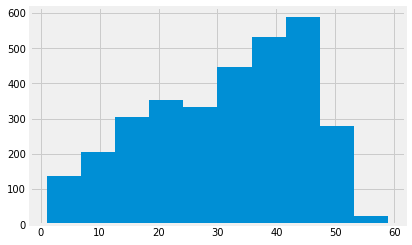

In [11]:
#We calculate the number of words in each tweet and look at the length distribution.
lens = data.text.str.split().apply(lambda x: len(x))
print(lens.describe())
lens.hist()

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'


def remove_links(tweet):
    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet


# # cleaning master function
# def clean_tweet(tweet, bigrams=False):
#     tweet = remove_users(tweet)
#     tweet = remove_links(tweet)
#     tweet = tweet.lower() # lower case
#     tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
#     tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
#     tweet = re.sub(r'[^\x00-\x7F]+','', tweet)
#     tweet_token_list = [word for word in tweet.split(' ')
#                             if word not in my_stopwords] # remove stopwords

#     if bigrams:
#         tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]
#                                             for i in range(len(tweet_token_list)-1)]
#     tweet = ' '.join(tweet_token_list)
#     return tweet


#create a function to clean the tweets
def cleanTxt(text) :
  text = remove_users(text)
  text = remove_links(text)
  text = text.lower() # lower case
  text = re.sub('['+my_punctuation + ']+', ' ', text) # strip punctuation
  text = re.sub('([0-9]+)', '', text) # remove numbers
  text = re.sub(r'[^\x00-\x7F]+','', text)

  text = re.sub('@[^A-Za-z0-9^,!.\/+-=]', '', text) #remove mentions
  text = re.sub(r'#', '', text) #remove the hashtag symbol
  text= re.sub(r'RT[\s]+', '', text) #removing RT (retweets) text 
  text = re.sub(r'https?:\/\/\S+', '', text) #remove hyperlink
  text = re.sub('ENDOFARTICLE.','', text) # get rid of the "ENDOFARTICLE." text
  tweet_token_list = [word for word in text.split(' ')
                            if word not in my_stopwords] # remove stopwords
  text = ' '.join(tweet_token_list)

  return text
df_cln= data.text.apply(cleanTxt)
cln = [' '.join(df_cln)]
listToStr = ' '.join(map(str, cln))   
#print(listToStr) # unhyphenate in case you want to see it



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df_cln

0               may opponents  enemies  \n\nwe americans 
1       remember purpose politics isnt totally unrelen...
2       know tensions high tough election like \n\nbut...
3       going first democrats win arizona  years \n\nw...
4       becoming clearer hour record numbers americans...
                              ...                        
3195    thoughts prayers mustafa kassem family difficu...
3196    seems like great reason rejoin paris agreement...
3197    im proud today  campaign launching hbcu studen...
3198    ready debate donald trump economy  american pe...
3199    cornell right  everything stake november  get ...
Name: text, Length: 3200, dtype: object

In [ ]:

import nltk
from nltk.util import ngrams
nltk.download('punkt')

# Function to generate n-grams from sentences.
def extract_ngrams(data, num):
    n_grams = ngrams(nltk.word_tokenize(data), num)
    return [ ' '.join(grams) for grams in n_grams]
onegram = ("1-gram: ", extract_ngrams(listToStr, 1))
twogram = ("2-gram: ", extract_ngrams(listToStr, 2))
threegram = ("3-gram: ", extract_ngrams(listToStr, 3))
fourgram = ("4-gram: ", extract_ngrams(listToStr, 4))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
fourgram[1][1:4]

['opponents enemies we americans',
 'enemies we americans remember',
 'we americans remember purpose']

In [ ]:
unigramFreq = collections.Counter(list(onegram[1]))
trigramFreq = collections.Counter(list(threegram[1]))
bigramFreq = collections.Counter(list(twogram[1]))
quadgramFreq = collections.Counter(list(fourgram[1]))
quadgramFreq.most_common(10)

[('four years donald trump', 22),
 ('donald trump white house', 19),
 ('end gun violence epidemic', 19),
 ('last day register vote', 18),
 ('today last day register', 15),
 ('trump one term president', 14),
 ('donald trump one term', 13),
 ('get donald trump white', 13),
 ('help keep momentum going', 13),
 ('make donald trump one', 12)]

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords, 
            min_font_size = 10).generate(str(df_cln)) 


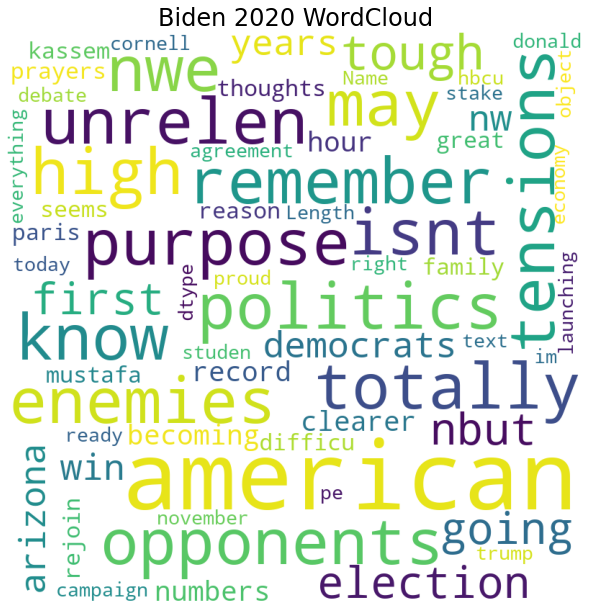

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title ("Biden 2020 WordCloud", size=24)
plt.show() 

In [ ]:

top30 = bigramFreq.most_common(30)

In [ ]:
top30quad = quadgramFreq.most_common(30)
top30uni = unigramFreq.most_common(30)
top30tri = trigramFreq.most_common(30)

In [ ]:
top30[1][1]

147

Text(0.5, 1.0, 'Top Biden 2020 - 30 3 Grams')

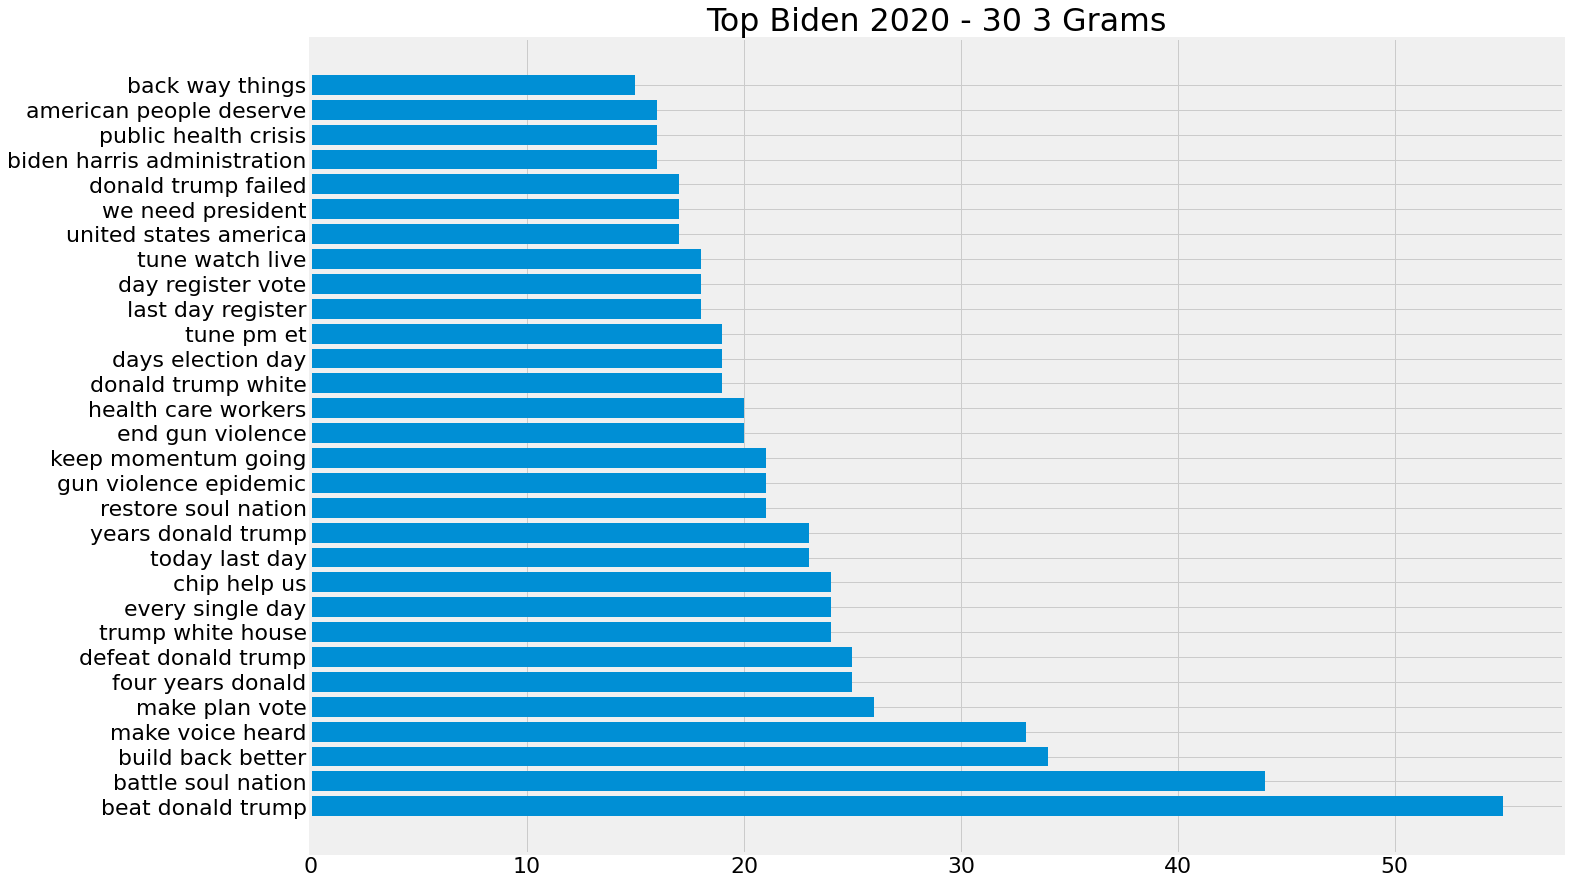

In [ ]:
import matplotlib.pyplot as plt
top30qtri  = [list(elem) for elem in top30tri]
xs, ys = [*zip(*top30tri)]
plt.figure(figsize=(20,15), )
plt.rcParams.update({'font.size': 22})
plt.barh(xs,ys)
plt.title ("Top Biden 2020 - 30 3 Grams")